In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\thaku\Downloads\archive\labeled_data.csv")
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0.0,3.0,0.0,0.0,3.0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1.0,3.0,0.0,3.0,0.0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2.0,3.0,0.0,3.0,0.0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3.0,3.0,0.0,2.0,1.0,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4.0,6.0,0.0,6.0,0.0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
65401,NaN,NaN,NaN,NaN,NaN,hate,we should forcibly remove all the foreigners f...
65402,NaN,NaN,NaN,NaN,NaN,hate,we should forcibly remove all the immigrants f...
65403,NaN,NaN,NaN,NaN,NaN,hate,dalits are unworthy of the Gods love
65404,NaN,NaN,NaN,NaN,NaN,hate,dalits are worthless


In [3]:
data.drop(data.columns[[0,1,2,3,4]],axis=1,inplace=True)
data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
condition = data['class']=='hate'
data=data[~condition]
data

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
65254,nothate,This meal is so disgusting I wanna die
65293,nothate,"this apartment is full of rats, it's disgusting"
65313,nothate,"the street was full of rats, it was appalling!"
65314,nothate,"the street was full of snakes, it was appalling!"


In [5]:
data['class']=data['class'].replace({'1':1,'2':1,'nothate': 0}).astype(int)
#data['class'].astype(int)
data.dtypes

C:\Users\thaku\AppData\Local\Temp\ipykernel_19424\2824896464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class']=data['class'].replace({'1':1,'2':1,'nothate': 0}).astype(int)


class     int32
tweet    object
dtype: object

In [6]:
print(data['class'].value_counts()[1])
print(data['class'].value_counts()[0])

23353
19929


In [7]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nlp = spacy.load('en_core_web_sm')


In [8]:
from textblob import TextBlob

In [9]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    
    # Remove special characters and numbers
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    
    # Tokenize the text using Spacy
    doc = nlp(text)
    
    # Lemmatize and remove stopwords
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    
    # Perform spelling correction using TextBlob
    corrected_tokens = [TextBlob(token).correct().raw for token in tokens]
    
    # Join the tokens back into a single string
    processed_text = ' '.join(corrected_tokens)
    
    return processed_text

In [10]:
tweets = [
    "I hate this movie! It's terrible.",
    "This is the best day ever!",
    "They are so stupid and ignorant.",
    "!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...",
]

preprocessed_tweets = [preprocess_text(tweet) for tweet in tweets]

for tweet, preprocessed_tweet in zip(tweets, preprocessed_tweets):
    print(f"Original tweet: {tweet}")
    print(f"Preprocessed tweet: {preprocessed_tweet}")
    print()


Original tweet: I hate this movie! It's terrible.
Preprocessed tweet: hate movie terrible

Original tweet: This is the best day ever!
Preprocessed tweet: good day

Original tweet: They are so stupid and ignorant.
Preprocessed tweet: stupid ignorant

Original tweet: !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
Preprocessed tweet:   it mayasolovely woman not complain clean house amp man trash



In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

In [ ]:
# Preprocess the tweets
preprocessed_tweets = data['tweet'].apply(preprocess_text)

In [22]:
processed_data = pd.concat([preprocessed_tweets, data["class"]], axis=1)

In [23]:
# Assuming preprocessed_tweets is the preprocessed DataFrame

# Specify the path and filename for saving the preprocessed tweets
save_path = r"C:\Users\thaku\Downloads\archive\processed_data.csv"

# Save the preprocessed tweets to a CSV file
processed_data.to_csv(save_path, index=False)


In [ ]:
processed_data = pd.read_csv(r"C:\Users\thaku\Downloads\archive\processed_data.csv")
#processed_data = processed_data.dropna(subset=['tweet'])

In [13]:
# Find rows with null values
null_rows = processed_data[processed_data.isnull().any(axis=1)]

# Print rows with null values and their indices
for index, row in null_rows.iterrows():
    print("Row Index:", index)
    print(row)
    print("------------------------")

In [14]:
preprocessed_tweets = processed_data['tweet']
preprocessed_tweets

0          it mayasolovely woman not complain clean hou...
1          it meet boy dat coldtyga down bad coffin dat...
2          it urkindofbrand dawn it sbabylife fuck bitc...
3              it c_g_anderson viva_base look like tyranny
4          it shenikarobert shit hear true baker bitch ...
                               ...                        
43277                             meal disgusting anna die
43278                             apartment rat disgusting
43279                                 street rat appalling
43280                               street snake appalling
43281                               banana black repulsive
Name: tweet, Length: 43282, dtype: object

In [15]:
# Initialize the TF-IDF vectorizer with sparse=True
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed tweets
tfidf_matrix = vectorizer.fit_transform(preprocessed_tweets)

In [16]:
tfidf_matrix_csr = csr_matrix(tfidf_matrix)
print(tfidf_matrix_csr)

  (0, 25440)	0.24037786620650675
  (0, 15233)	0.22970577827267377
  (0, 800)	0.26788759780153315
  (0, 11125)	0.3161468689594693
  (0, 4572)	0.36839098622549915
  (0, 4934)	0.3803536675209929
  (0, 17461)	0.15172775706278385
  (0, 27450)	0.2291281805643441
  (0, 15573)	0.5830264743281658
  (0, 12240)	0.14805199346504186
  (1, 18901)	0.24536375057981924
  (1, 23138)	0.29197978070332264
  (1, 10492)	0.1375309969498262
  (1, 4747)	0.3531807573865367
  (1, 1786)	0.19351499188702614
  (1, 7011)	0.32397182403175234
  (1, 4771)	0.44687304801565153
  (1, 5935)	0.4876242448058139
  (1, 3017)	0.23347862356952287
  (1, 15686)	0.252239690490173
  (1, 12240)	0.11347760092842218
  (2, 22118)	0.19256623570609044
  (2, 5037)	0.3990132976868302
  (2, 5558)	0.30248584233729753
  (2, 23206)	0.2643127361744363
  :	:
  (43275, 24809)	0.6616089430248392
  (43275, 26582)	0.5878239858462933
  (43275, 24830)	0.31852597358318263
  (43275, 2636)	0.339525805096192
  (43276, 23955)	0.6841852007884186
  (43276, 913

In [17]:
# Split the vectorized data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix_csr,
                                                    data['class'],
                                                    test_size=0.2,
                                                    random_state=42)

# Print the shapes of train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (34625, 28181) (34625,)
Test set shape: (8657, 28181) (8657,)


In [18]:
import joblib

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Create a Decision Tree Classifier model
decision_tree_clf = DecisionTreeClassifier()

# Train the model on the training data
decision_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
# Predict labels for the test data
y_pred = decision_tree_clf.predict(X_test)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
joblib.dump(decision_tree_clf, 'DT.pkl')

Accuracy: 0.9222594432251358
F1 Score: 0.9290608200695689
Precision: 0.9244808055380742
Recall: 0.9336864406779661


['DT.pkl']

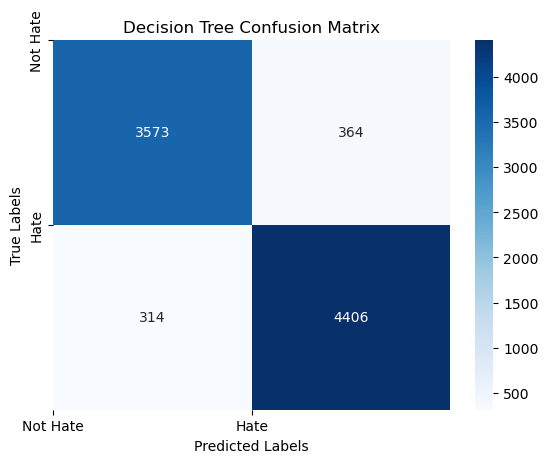

In [67]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and ticks to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Decision Tree Confusion Matrix")
plt.xticks([0, 1], ["Not Hate", "Hate"])
plt.yticks([0, 1], ["Not Hate", "Hate"])

# Show the plot
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression


# Create a Logistic Regression model
logistic_regression_clf = LogisticRegression()

# Train the model on the training data
logistic_regression_clf.fit(X_train, y_train)

# Predict labels for the test data
y_pred = logistic_regression_clf.predict(X_test)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
joblib.dump(logistic_regression_clf, 'LR.pkl')

Accuracy: 0.9302298717800623
F1 Score: 0.9356076759061834
Precision: 0.9416309012875537
Recall: 0.9296610169491526


['LR.pkl']

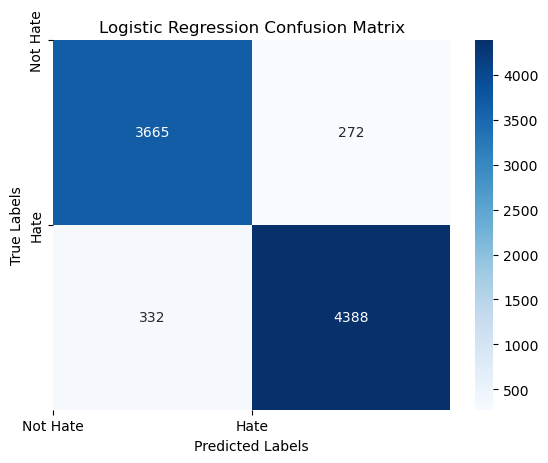

In [69]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and ticks to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Logistic Regression Confusion Matrix")
plt.xticks([0, 1], ["Not Hate", "Hate"])
plt.yticks([0, 1], ["Not Hate", "Hate"])

# Show the plot
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier model
random_forest_clf = RandomForestClassifier()

# Train the model on the training data
random_forest_clf.fit(X_train, y_train)

# Predict labels for the test data
y_pred = random_forest_clf.predict(X_test)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
joblib.dump(random_forest_clf, 'RF.pkl')

Accuracy: 0.9320780870971468
F1 Score: 0.9378698224852071
Precision: 0.9354974704890388
Recall: 0.9402542372881356


['RF.pkl']

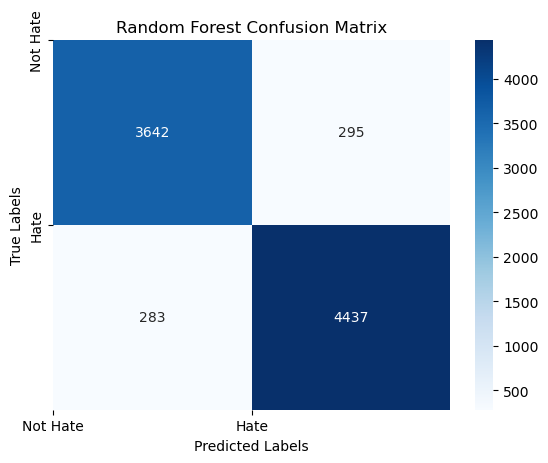

In [71]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and ticks to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest Confusion Matrix")
plt.xticks([0, 1], ["Not Hate", "Hate"])
plt.yticks([0, 1], ["Not Hate", "Hate"])

# Show the plot
plt.show()

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-Nearest Neighbors Classifier model
knn_clf = KNeighborsClassifier(n_neighbors=25)

# Train the model on the training data
knn_clf.fit(X_train, y_train)

# Predict labels for the test data
y_pred = knn_clf.predict(X_test)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8247660852489315
F1 Score: 0.8215923791602964
Precision: 0.9233412635474492
Recall: 0.7400423728813559


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

# Perform feature scaling
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform feature selection
selector = SelectKBest(k=10)  # Adjust the number of selected features as needed
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Create a K-Nearest Neighbors Classifier model
knn_clf = KNeighborsClassifier()

# Define the hyperparameter grid for grid search
param_grid = {'n_neighbors': [3, 5, 7]}  # Adjust the values as needed

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

# Get the best model from grid search
knn_best = grid_search.best_estimator_

# Predict labels for the test data
y_pred = knn_best.predict(X_test_selected)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
joblib.dump(knn_best, 'KNN.pkl')

C:\Users\thaku\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0 0 0 ... 0 0 0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\thaku\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Accuracy: 0.7079819799006585
F1 Score: 0.7854354099473773
Precision: 0.6551968280940244
Recall: 0.9802966101694915


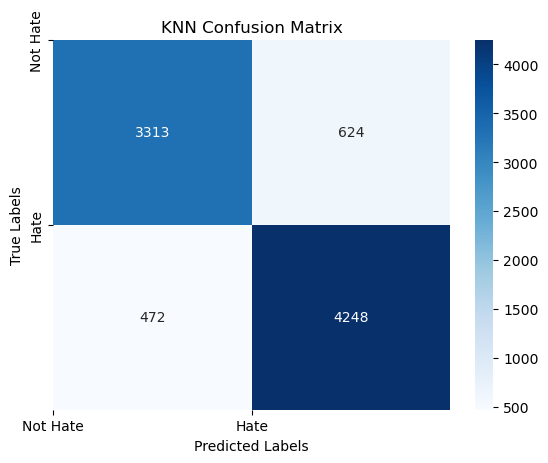

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and ticks to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("KNN Confusion Matrix")
plt.xticks([0, 1], ["Not Hate", "Hate"])
plt.yticks([0, 1], ["Not Hate", "Hate"])

# Show the plot
plt.show()

In [41]:
from sklearn.svm import SVC

# Create a Support Vector Machine Classifier model
svm_clf = SVC()

# Train the model on the training data
svm_clf.fit(X_train, y_train)

# Predict labels for the test data
y_pred = svm_clf.predict(X_test)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
joblib.dump(svm_clf, 'SVM.pkl')

Accuracy: 0.9385468407069424
F1 Score: 0.9437037037037037
Precision: 0.9427061310782241
Recall: 0.9447033898305085


['SVM.pkl']

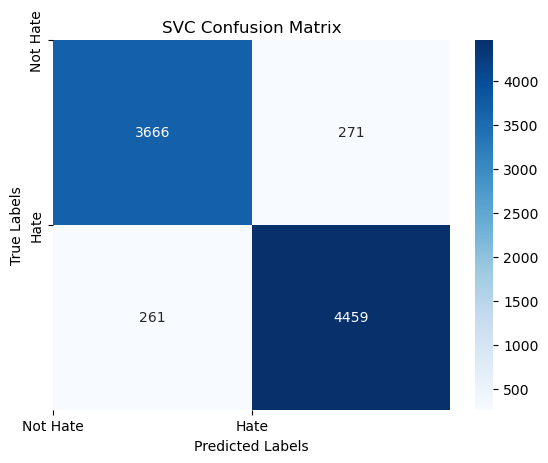

In [73]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and ticks to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("SVC Confusion Matrix")
plt.xticks([0, 1], ["Not Hate", "Hate"])
plt.yticks([0, 1], ["Not Hate", "Hate"])

# Show the plot
plt.show()

In [42]:
from sklearn.naive_bayes import MultinomialNB

# Create a Naive Bayes Classifier model
naive_bayes_clf = MultinomialNB()

# Train the model on the training data
naive_bayes_clf.fit(X_train, y_train)

# Predict labels for the test data
y_pred = naive_bayes_clf.predict(X_test)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
joblib.dump(naive_bayes_clf, 'MNB.pkl')

Accuracy: 0.9052789649994224
F1 Score: 0.9149024491490246
Precision: 0.8966639544344996
Recall: 0.9338983050847458


['MNB.pkl']

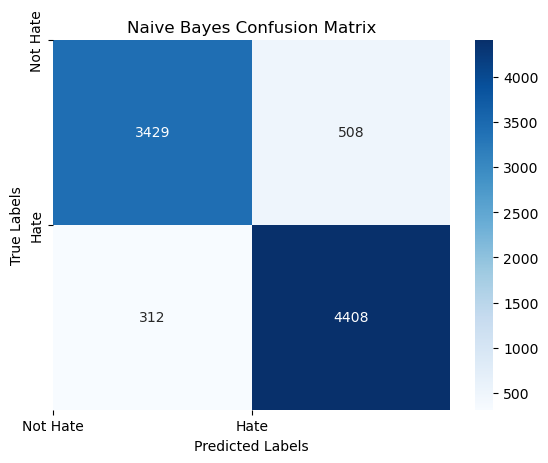

In [75]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and ticks to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Naive Bayes Confusion Matrix")
plt.xticks([0, 1], ["Not Hate", "Hate"])
plt.yticks([0, 1], ["Not Hate", "Hate"])

# Show the plot
plt.show()

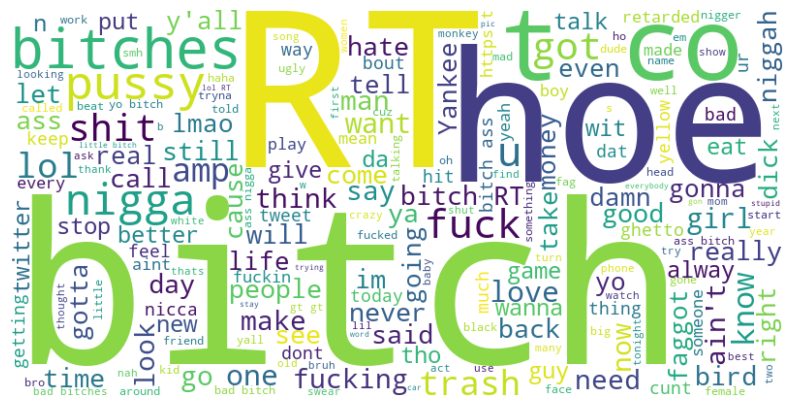

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter out tweets labeled as hate speech (class = 1)
hate_tweets = data[data['class'] == 1]['tweet']

# Join all the hate tweets into a single string
hate_text = ' '.join(hate_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hate_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


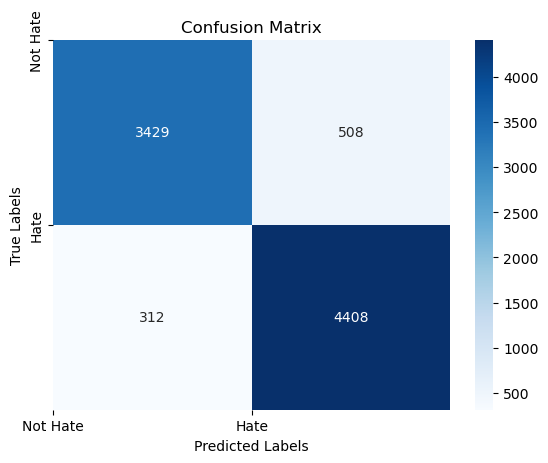

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and ticks to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.xticks([0, 1], ["Not Hate", "Hate"])
plt.yticks([0, 1], ["Not Hate", "Hate"])

# Show the plot
plt.show()


In [43]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Create a Voting Classifier ensemble
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', decision_tree_clf),
    ('logistic_regression', logistic_regression_clf),
    ('random_forest', random_forest_clf),
    #('knn', knn_clf),
    ('svm', svm_clf),
    ('naive_bayes', naive_bayes_clf)
], voting='hard')

# Train the Voting Classifier on the training data
voting_clf.fit(X_train, y_train)

# Predict labels for the test data using the Voting Classifier
voting_pred = voting_clf.predict(X_test)

# Calculate and print the evaluation metrics for the Voting Classifier
voting_accuracy = accuracy_score(y_test, voting_pred)
voting_f1 = f1_score(y_test, voting_pred)
voting_precision = precision_score(y_test, voting_pred)
voting_recall = recall_score(y_test, voting_pred)

print("Voting Classifier - Accuracy:", voting_accuracy)
print("Voting Classifier - F1 Score:", voting_f1)
print("Voting Classifier - Precision:", voting_precision)
print("Voting Classifier - Recall:", voting_recall)


Voting Classifier - Accuracy: 0.9397019752801201
Voting Classifier - F1 Score: 0.9448785638859556
Voting Classifier - Precision: 0.9418947368421052
Voting Classifier - Recall: 0.9478813559322034


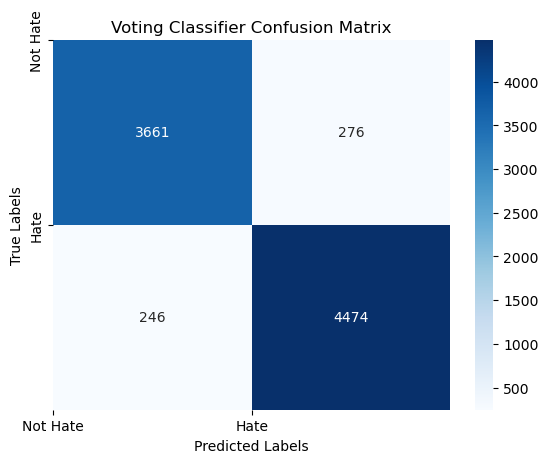

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, voting_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and ticks to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Voting Classifier Confusion Matrix")
plt.xticks([0, 1], ["Not Hate", "Hate"])
plt.yticks([0, 1], ["Not Hate", "Hate"])

# Show the plot
plt.show()


In [53]:
# Create a Bagging Classifier ensemble
bagging_clf = BaggingClassifier(base_estimator=random_forest_clf, n_estimators=10)

# Train the Bagging Classifier on the training data
bagging_clf.fit(X_train, y_train)

# Predict labels for the test data using the Bagging Classifier
bagging_pred = bagging_clf.predict(X_test)

# Calculate and print the evaluation metrics for the Bagging Classifier
bagging_accuracy = accuracy_score(y_test, bagging_pred)
bagging_f1 = f1_score(y_test, bagging_pred)
bagging_precision = precision_score(y_test, bagging_pred)
bagging_recall = recall_score(y_test, bagging_pred)

print("Bagging Classifier - Accuracy:", bagging_accuracy)
print("Bagging Classifier - F1 Score:", bagging_f1)
print("Bagging Classifier - Precision:", bagging_precision)
print("Bagging Classifier - Recall:", bagging_recall)

C:\Users\thaku\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier - Accuracy: 0.9313850063532402
Bagging Classifier - F1 Score: 0.9368622448979591
Bagging Classifier - Precision: 0.9400597269624573
Bagging Classifier - Recall: 0.9336864406779661


In [82]:
# Create a Bagging Classifier ensemble
bagging_clf = BaggingClassifier(base_estimator=svm_clf, n_estimators=40)

# Train the Bagging Classifier on the training data
bagging_clf.fit(X_train, y_train)

# Predict labels for the test data using the Bagging Classifier
bagging_pred = bagging_clf.predict(X_test)

# Calculate and print the evaluation metrics for the Bagging Classifier
bagging_accuracy = accuracy_score(y_test, bagging_pred)
bagging_f1 = f1_score(y_test, bagging_pred)
bagging_precision = precision_score(y_test, bagging_pred)
bagging_recall = recall_score(y_test, bagging_pred)

print("Bagging Classifier - Accuracy:", bagging_accuracy)
print("Bagging Classifier - F1 Score:", bagging_f1)
print("Bagging Classifier - Precision:", bagging_precision)
print("Bagging Classifier - Recall:", bagging_recall)

C:\Users\thaku\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier - Accuracy: 0.9379692734203535
Bagging Classifier - F1 Score: 0.9431204321576104
Bagging Classifier - Precision: 0.9430205464943868
Bagging Classifier - Recall: 0.9432203389830508


In [26]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Create the base classifiers
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()
svm_classifier = SVC()

# Create bagging ensembles for each base estimator
bagging_random_forest = BaggingClassifier(estimator=random_forest, n_estimators=15)
bagging_decision_tree = BaggingClassifier(estimator=decision_tree, n_estimators=5)
bagging_svm = BaggingClassifier(estimator=svm_classifier, n_estimators=25)

# Create the voting classifier with the bagging ensembles
voting_classifier = VotingClassifier(
    estimators=[('rf', bagging_random_forest), ('dt', bagging_decision_tree), ('svc', bagging_svm)]
)

# Train the voting classifier on the training data
voting_classifier.fit(X_train, y_train)

# Predict labels for the test data
y_pred = voting_classifier.predict(X_test)

# Calculate and print the evaluation metrics for the Bagging Classifier
bagging_accuracy = accuracy_score(y_test, y_pred)
bagging_f1 = f1_score(y_test, y_pred)
bagging_precision = precision_score(y_test, y_pred)
bagging_recall = recall_score(y_test, y_pred)

print("Bagging Classifier - Accuracy:", bagging_accuracy)
print("Bagging Classifier - F1 Score:", bagging_f1)
print("Bagging Classifier - Precision:", bagging_precision)
print("Bagging Classifier - Recall:", bagging_recall)


Bagging Classifier - Accuracy: 0.9383158137923068
Bagging Classifier - F1 Score: 0.9434322033898305
Bagging Classifier - Precision: 0.9434322033898305
Bagging Classifier - Recall: 0.9434322033898305


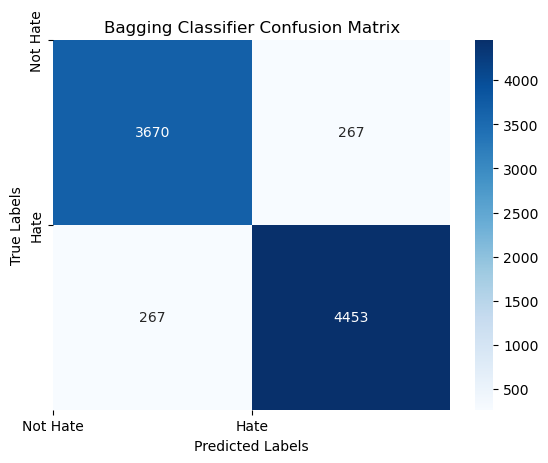

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and ticks to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Bagging Classifier Confusion Matrix")
plt.xticks([0, 1], ["Not Hate", "Hate"])
plt.yticks([0, 1], ["Not Hate", "Hate"])

# Show the plot
plt.show()

In [60]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Create the base classifiers
random_forest = RandomForestClassifier()
svm_classifier = SVC()

# Create bagging ensembles for each base estimator
bagging_random_forest = BaggingClassifier(estimator=random_forest, n_estimators=10)

bagging_svm = BaggingClassifier(estimator=svm_classifier, n_estimators=20)

# Create the voting classifier with the bagging ensembles
voting_classifier = VotingClassifier(
    estimators=[('rf', bagging_random_forest), ('svc', bagging_svm)]
)

# Train the voting classifier on the training data
voting_classifier.fit(X_train, y_train)

# Predict labels for the test data
y_pred = voting_classifier.predict(X_test)

# Calculate and print the evaluation metrics for the Bagging Classifier
bagging_accuracy = accuracy_score(y_test, y_pred)
bagging_f1 = f1_score(y_test, y_pred)
bagging_precision = precision_score(y_test, y_pred)
bagging_recall = recall_score(y_test, y_pred)

print("Bagging Classifier - Accuracy:", bagging_accuracy)
print("Bagging Classifier - F1 Score:", bagging_f1)
print("Bagging Classifier - Precision:", bagging_precision)
print("Bagging Classifier - Recall:", bagging_recall)


Bagging Classifier - Accuracy: 0.9302298717800623
Bagging Classifier - F1 Score: 0.9348435814455233
Bagging Classifier - Precision: 0.9523076923076923
Bagging Classifier - Recall: 0.9180084745762712


In [57]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Create the base classifiers
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()

# Create bagging ensembles for each base estimator
bagging_random_forest = BaggingClassifier(estimator=random_forest, n_estimators=10 )
bagging_decision_tree = BaggingClassifier(estimator=decision_tree, n_estimators=5)

# Create the voting classifier with the bagging ensembles
voting_classifier = VotingClassifier(estimators=[('rf', bagging_random_forest), ('dt', bagging_decision_tree)])

# Train the voting classifier on the training data
voting_classifier.fit(X_train, y_train)

# Predict labels for the test data
y_pred = voting_classifier.predict(X_test)
# Calculate and print the evaluation metrics for the Bagging Classifier
bagging_accuracy = accuracy_score(y_test, y_pred)
bagging_f1 = f1_score(y_test, y_pred)
bagging_precision = precision_score(y_test, y_pred)
bagging_recall = recall_score(y_test, y_pred)

print("Bagging Classifier - Accuracy:", bagging_accuracy)
print("Bagging Classifier - F1 Score:", bagging_f1)
print("Bagging Classifier - Precision:", bagging_precision)
print("Bagging Classifier - Recall:", bagging_recall)


Bagging Classifier - Accuracy: 0.9236456047129491
Bagging Classifier - F1 Score: 0.9283934568302459
Bagging Classifier - Precision: 0.9499002438483707
Bagging Classifier - Recall: 0.9078389830508474


In [66]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create the base estimator
base_estimator = RandomForestClassifier()

# Create the bagging ensemble
bagging_ensemble = BaggingClassifier(estimator=base_estimator)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'estimator__n_estimators': [10, 20, 30],  # Number of trees in the Random Forest
    'estimator__max_depth': [None, 5, 10],       # Maximum depth of the trees
    'estimator__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'estimator__min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=bagging_ensemble, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator and predict labels for the test data
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)
# Calculate and print the evaluation metrics for the Bagging Classifier
bagging_accuracy = accuracy_score(y_test, y_pred)
bagging_f1 = f1_score(y_test, y_pred)
bagging_precision = precision_score(y_test, y_pred)
bagging_recall = recall_score(y_test, y_pred)

print("Bagging Classifier - Accuracy:", bagging_accuracy)
print("Bagging Classifier - F1 Score:", bagging_f1)
print("Bagging Classifier - Precision:", bagging_precision)
print("Bagging Classifier - Recall:", bagging_recall)


Bagging Classifier - Accuracy: 0.931962573639829
Bagging Classifier - F1 Score: 0.9376125410443809
Bagging Classifier - Precision: 0.93751323872061
Bagging Classifier - Recall: 0.9377118644067797


In [21]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [18]:
import joblib

In [19]:
random_forest_clf=joblib.load('RF.pkl')

In [22]:
# Create an AdaBoost Classifier ensemble
adaboost_clf = AdaBoostClassifier(estimator=random_forest_clf, n_estimators=5)

# Train the AdaBoost Classifier on the training data
adaboost_clf.fit(X_train, y_train)

# Predict labels for the test data using the AdaBoost Classifier
adaboost_pred = adaboost_clf.predict(X_test)

# Calculate and print the evaluation metrics for the AdaBoost Classifier
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_f1 = f1_score(y_test, adaboost_pred)
adaboost_precision = precision_score(y_test, adaboost_pred)
adaboost_recall = recall_score(y_test, adaboost_pred)

print("AdaBoost Classifier - Accuracy:", adaboost_accuracy)
print("AdaBoost Classifier - F1 Score:", adaboost_f1)
print("AdaBoost Classifier - Precision:", adaboost_precision)
print("AdaBoost Classifier - Recall:", adaboost_recall)

AdaBoost Classifier - Accuracy: 0.9372761926764468
AdaBoost Classifier - F1 Score: 0.942679193497308
AdaBoost Classifier - Precision: 0.939406690511256
AdaBoost Classifier - Recall: 0.9459745762711864


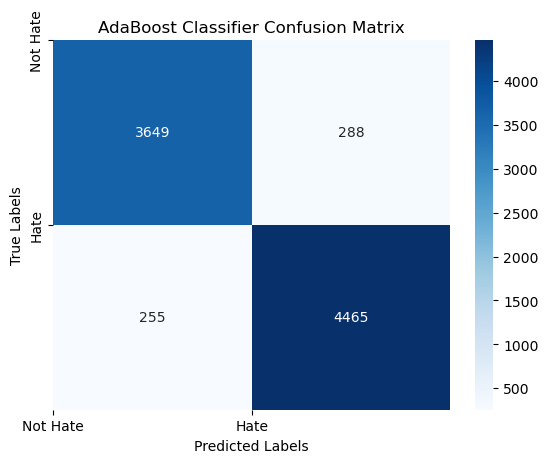

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, adaboost_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and ticks to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("AdaBoost Classifier Confusion Matrix")
plt.xticks([0, 1], ["Not Hate", "Hate"])
plt.yticks([0, 1], ["Not Hate", "Hate"])

# Show the plot
plt.show()

In [102]:
# Load the pre-trained models
models = {
    'Random Forest': joblib.load('RF.pkl'),
    'Logistic Regression': joblib.load('LR.pkl'),
    #'KNN': joblib.load('knn_model.pkl'),
    'Support Vector Machine': joblib.load('SVM.pkl'),
    'Naive Bayes': joblib.load('MNB.pkl'),
    'Decision Tree': joblib.load('DT.pkl')
}

# Get user input
user_input = input("Enter the text: ")

# Preprocess the input text
preprocessed_text = preprocess_text(user_input)

# Vectorize the preprocessed text
#vectorizer = TfidfVectorizer()
#tfidf_matrix = vectorizer.fit_transform(preprocessed_tweets)
text_vector = vectorizer.transform([preprocessed_text])
text_vector = csr_matrix(text_vector)
print(text_vector)
text_vector.shape



Enter the text: jews are pigs
  (0, 18815)	0.7435666509497062
  (0, 12757)	0.6686618245387108


(1, 28181)

In [103]:
# Predict using each model
for model_name, model in models.items():
    prediction = model.predict(text_vector)
    if prediction == 0:
        print(f"{model_name}: Not Hate")
    else:
        print(f"{model_name}: Hate")

Random Forest: Not Hate
Logistic Regression: Not Hate
Support Vector Machine: Not Hate
Naive Bayes: Not Hate
Decision Tree: Not Hate
